Q ---> Take four original photos. Do all the following feature extraction on your photos
a. Edge Detection 
b. Corner Detection
c. Line Detection
d. Gabor Filter
i. Orientation: 0 degrees, Wavelength: 20
ii. Orientation: 0 degrees, Wavelength: 80
iii. Orientation: 90 degrees, Wavelength: 30
iv. Orientation:150 degrees, Wavelength: 10
e. Discrete Wavelet Transform

# Libraries


In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Dataset

The images selected are stored in the dataset folder

In [2]:
path ='./dataset/'

Reading the images we stored in the datasets folder

In [3]:
img1 = cv.imread(path+'img1.jpg')#imread is used to load an image file from a location
img2 = cv.imread(path+'img2.jpg')
img3 = cv.imread(path+'img3.jpg')
img4 = cv.imread(path+'img4.jpg')

In [4]:
# a function display images in a single figure
def display_images(figure_size,rows, cols, images_raw, titles, greyscale=True):
    images=[]
    if greyscale:
        images= images_raw
    else:
        for image in images_raw:
            images.append(cv.cvtColor(image, cv.COLOR_BGR2RGB))
        
    fig = plt.figure(figsize=figure_size) #creating a figure
  
    # add subplots inside the figure so that we can see preview all the images at once
    for i in range(0, len(images)):        
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(images[i], cmap='gray')# Shows an image
        plt.title(titles[i])
        plt.axis('off')

In [5]:
images = [img1, img2, img3, img4]
titles = ['First Image','Second Image', 'Third Image', 'Fourth Image']

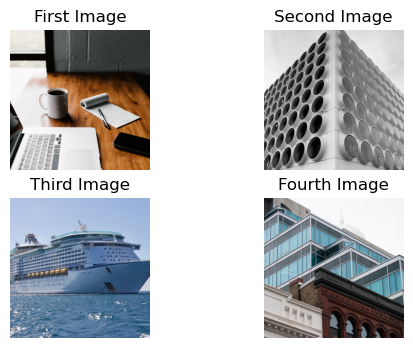

In [6]:
display_images((6,4), 2,2 ,images,titles, False)

Here are the four images we wish to do  feature extraction on

# a.) Edge Detection

In order to perform edge detection, we are converting the images to greyscale image

In [7]:
def edge_detection(inp_img):
    # we have to convert the image we received to greyscale
    """
    Parameters -> 
    Src -> The Source image in which the color space is to be changed
    code -> Color Space conversion code , In our case we are converting the image from BGR to greyscale, 
    hence, COLOR_BGR2GRAY
    """
    grey_img = cv.cvtColor(inp_img, cv.COLOR_BGR2GRAY)
    #Applying gaussian blur to the image to get rid of noise from the image and get better edge detection
    """
    src -> To specify the input image to which gaussian blur is to be applied
    ksize-> The kernel size for the operation, here we are using a 3*3 kernel
    """
    img_blur = cv.GaussianBlur(grey_img, (3,3), 0)
    #we are applying sobel edge detector
    """
    src -> Matrix of the input image
    ddepth-> representing the depth of the image
    dx -> x-derivative
    dy -> y_derivative
    ksize-> The kernel size for the operation, here we are using a 3*3 kernel
    """
    sobel_x =cv.Sobel(src=img_blur, ddepth=cv.CV_64F,dx=1, dy=0, ksize=3)
    sobel_y =cv.Sobel(src=img_blur, ddepth=cv.CV_64F,dx=0, dy=1, ksize=3)
    gx = cv.convertScaleAbs(sobel_x)#computes absolute value
    gy = cv.convertScaleAbs(sobel_y)
    sobel_xy = cv.addWeighted(gx, 0.5, gy, 0.5, 0)
    #We can also use the canny edge detector
    """
    src -> Input image
    threshold_lower -> Lower threshold
    threshold_upper -> Upper threshold
    """
    canny_image = cv.Canny(img_blur, 100, 200)
    images = [img_blur, sobel_xy, canny_image]
    titles = ['Image', 'Sobel XY', 'Canny Edge' ]
    
    display_images((10,7), 1,3 ,images,titles)#Calling the function we defined earlier

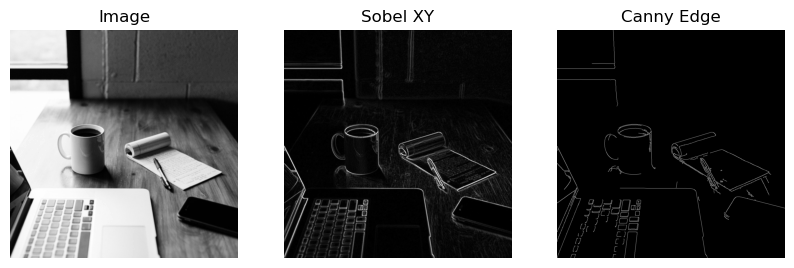

In [8]:
edge_detection(img1)

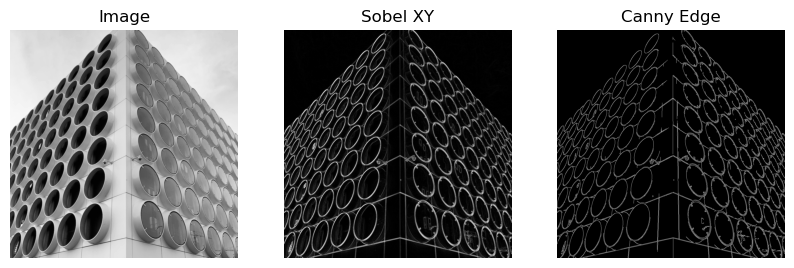

In [9]:
edge_detection(img2)

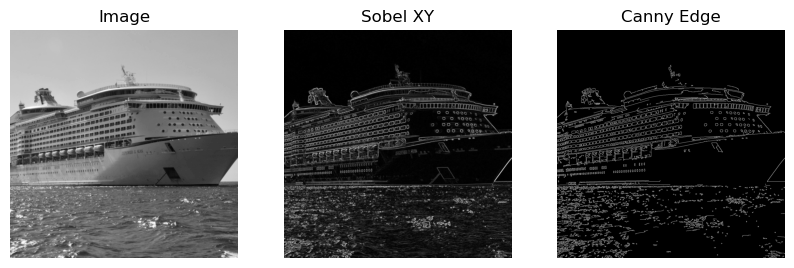

In [10]:
edge_detection(img3)

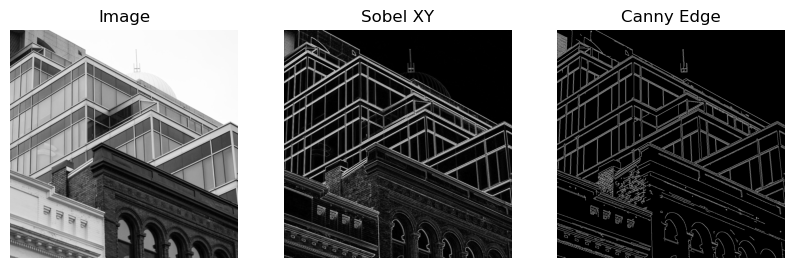

In [11]:
edge_detection(img4)

# b) Corner Detection

In [12]:
def cornerdetection(inp_img):
    corner_image = inp_img.copy()
    grey_img = cv.cvtColor(corner_image, cv.COLOR_BGR2GRAY)
    original_img = grey_img
    grey_img = np.float32(grey_img)
    #harris corner detection technique is used here
    """
    img -> Input Image
    blockSize -> Size of neighboorhood considered for corner detection
    ksize -> Aperture parameter of sober derivative used.
    k- Harris detector free parameter in the equation
    """
    harris_corner_img = cv.cornerHarris(grey_img, 2,3,0.04)
    
    """
    img -> Input Image 
    kernel -> The matrix with which the image is convolved
    """
    harris_corner_img = cv.dilate(harris_corner_img, None)

    corner_image[harris_corner_img>0.01*harris_corner_img.max()]=[0,0,255]
    display_images((6,4), 1,2 ,[original_img, corner_image],['Original', 'Harris Corner'],False)

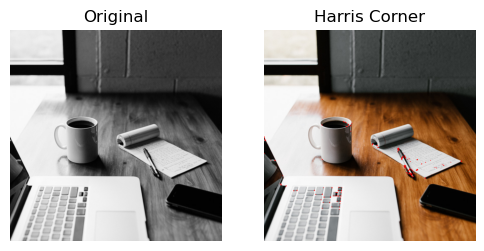

In [13]:
cornerdetection(img1)

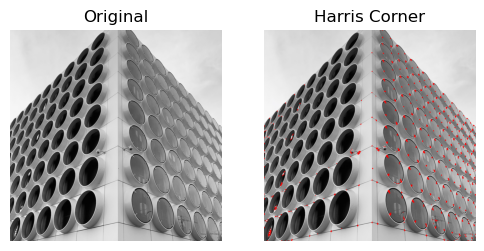

In [14]:
cornerdetection(img2)

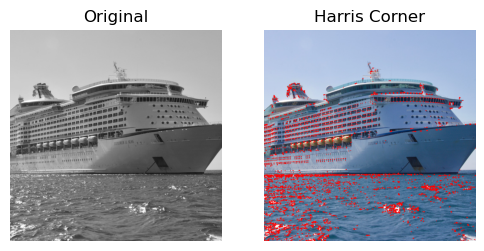

In [15]:
cornerdetection(img3)

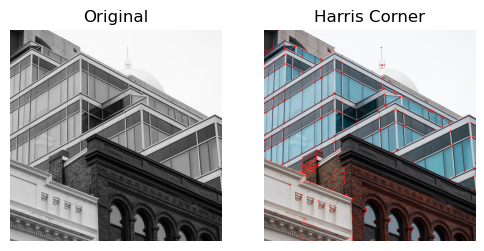

In [16]:
cornerdetection(img4)

# C.) Line Detection

In [17]:
def line_detection(im):
    image = im.copy()
    #convering the image to greyscale image
    """
    src -> To specify the input image to which gaussian blur is to be applied
    ksize-> The kernel size for the operation, here we are using a 3*3 kernel
    """
    grey_img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    #using canny edge detection method to detect the edges in the image
    #We can also use the canny edge detector
    """
    src -> Input image
    threshold_lower -> Lower threshold
    threshold_upper -> Upper threshold
    """
    canny_edge = cv.Canny(grey_img, 150,250,apertureSize=3)
    #using hough line detection method to detect lines.
    """
    img ->  Input image
    r -> r accuracy
    t -> Thera accuracy
    threshold -> Minimum no. of votes to be considered as line
    """
    hough_lines = cv.HoughLines(canny_edge, 1, np.pi/180, 200)
    
    #iterate over the array of r and theta values
    for params in hough_lines:
        arr = np.array(params[0], dtype=np.float64)
        r,t = arr #for seperating r and theta values
        
        #calculate sin and cos values
        
        sin_value = np.sin(t)
        cos_value = np.cos(t)
        
        #calculate rcostheta
        x0 = r*cos_value
        y0 = r*sin_value
        
        #calculate rounded value of rcostheta-1000sintheta, rsintheta+1000costheta, rcostheta+1000sintheta,
        # and rsintheta-1000costheta
        x1= int(x0+1000*(-sin_value))
        y1 = int(y0+1000*(cos_value))
        x2 = int(x0 - 1000*(-sin_value))
        y2 = int(y0 - 1000*(cos_value))
        
        # draw line between the points
        cv.line(image, (x1,y1), (x2,y2), (0,255,0), 2)
        
    #display the images
    display_images((6,4),2, 2, [image, image], ['Original', 'Hough Transform'], False)    

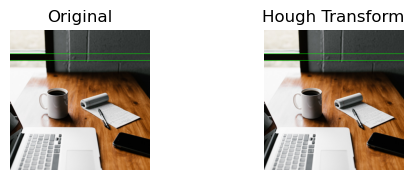

In [18]:
line_detection(img1)

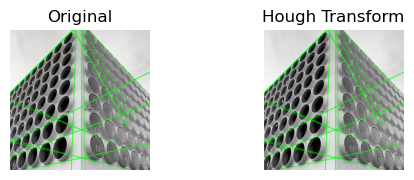

In [19]:
line_detection(img2)

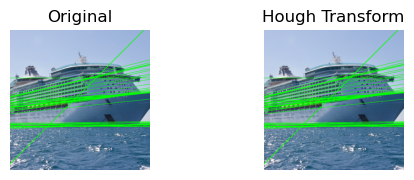

In [20]:
line_detection(img3)

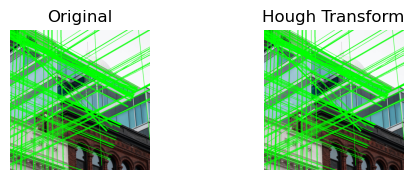

In [21]:
line_detection(img4)

# 4.) Gabor Filter

### It is a convolution filter. It simulates how we recognize 'Texture ' and sinusoidal term

In [22]:
def gabor_filter(image, t, lamda):
    k_size = 20
    sigma = 5 
    gamma=0.5
    phi=1
    kernel = cv.getGaborKernel((k_size, k_size), sigma, t, lamda, gamma, phi, ktype=cv.CV_32F)
    """
    Parameters
    ksize - Kernel size of the filter
    sigma - Standard deviation of the gaussian envelope
    theta - Orientation oof the normal to the parallel stripes
    lambd- Wavelength of sinusoidal factor
    gamma - aspect ratio
    phi- offset of the phase
    ktype - type of filter used
    """
    kernel_preview = kernel

    grey_img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    """
    convert the image to grey scale
    #parameter 1 - Source of the image
    #parameter 2- Conversion code - Here we have to convert from BLUE GREEN RED format to Greyscale
    
    """
    #apply the filter to an image
    filtered_img = cv.filter2D(grey_img, cv.CV_8UC3,kernel)
  
    return [grey_img, kernel_preview, filtered_img]

In [23]:
def apply_gabor_filter(image):
    orientations = [0,0,90,150]
    wavelengths=[20,80,30,10]
    images=[]
    spec1 = cv.imread('./assets/0_20.png')
    spec2 = cv.imread('./assets/0_80.png')
    spec3 = cv.imread('./assets/90_30.png')
    spec4 = cv.imread('./assets/150_10.png')
    specs = [spec1, spec2, spec3,spec4]
    titles = [['Specification','Original', 'Kernel', 'Filtered Image']*4]
    for i in range (0, len(orientations)):
        images.append(gabor_filter(image, orientations[i], wavelengths[i]))
    
    images_flattened =[]
    
    for i in range(0, len(images)):
        images_flattened.append(specs[i])
        for image in images[i]:
            images_flattened.append(image)

    titles_flattened =[]
    for title_set in titles:
        for title in  title_set:
            titles_flattened.append(title)        
            
    display_images((12,8),4, 4, images_flattened, titles_flattened)
    


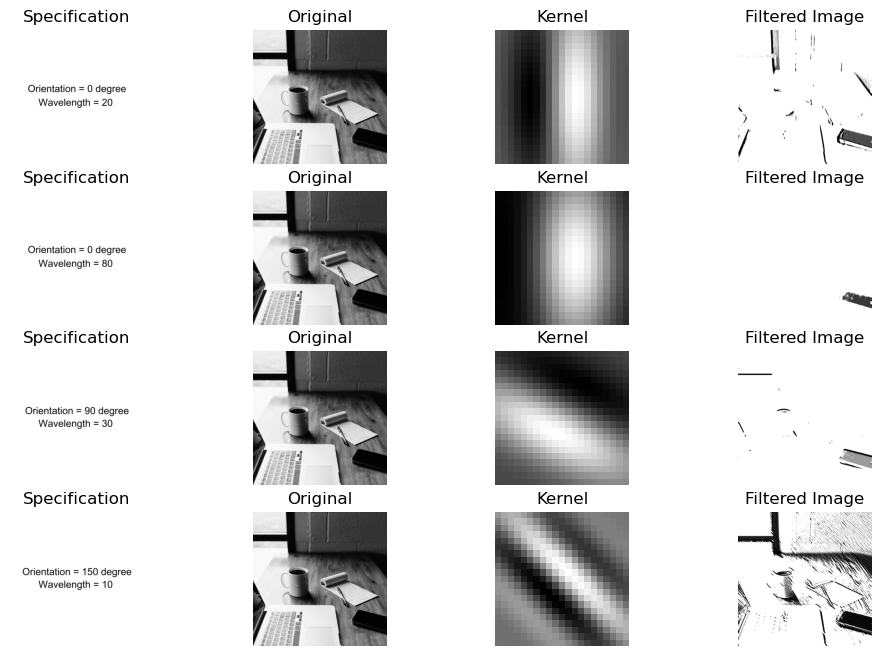

In [24]:
apply_gabor_filter(img1)

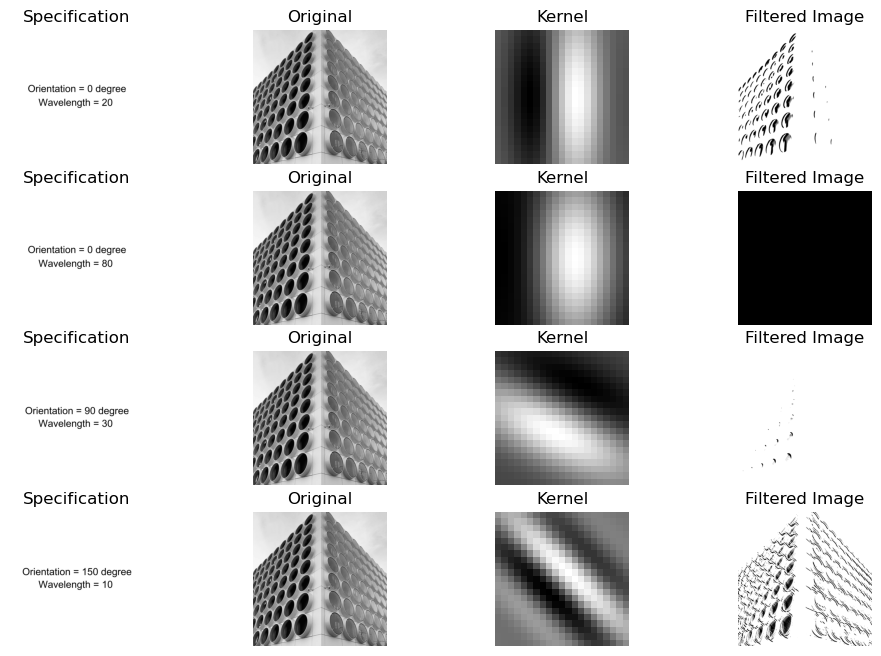

In [25]:
apply_gabor_filter(img2)

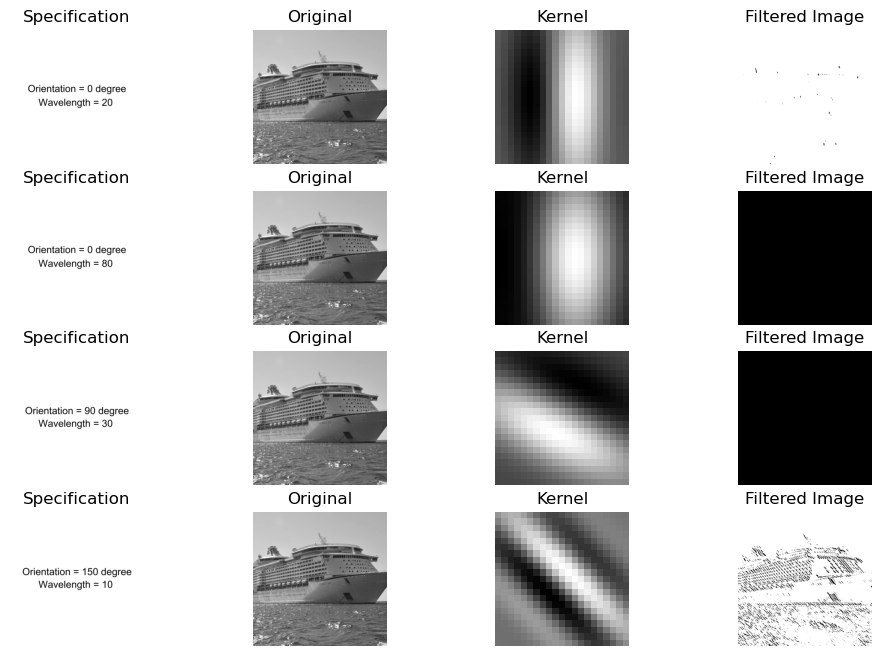

In [26]:
apply_gabor_filter(img3)

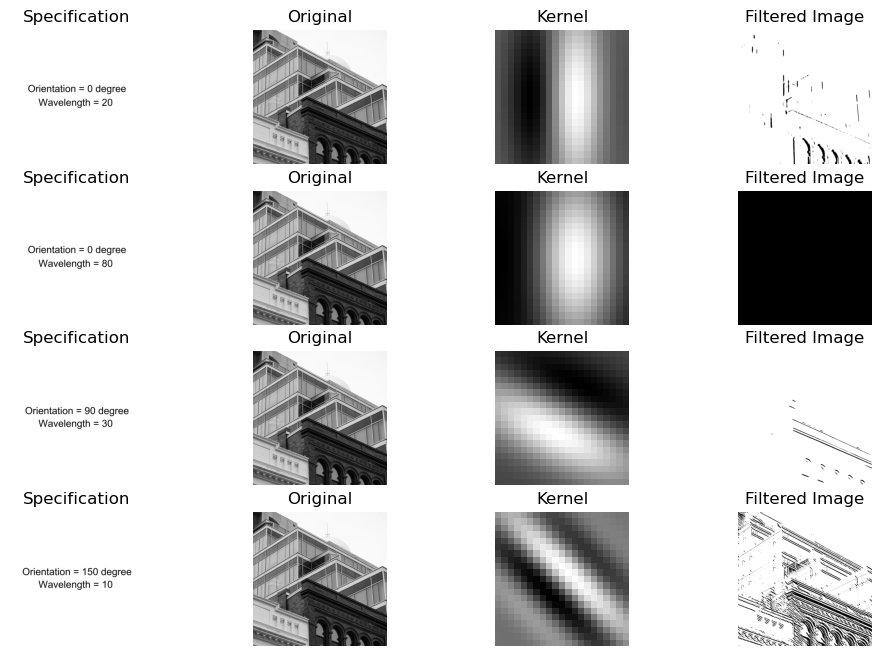

In [27]:
apply_gabor_filter(img4)

# e.) Discrete wavelet transform

In [28]:
import pywt
def discrete_wavelete_transform(im):
    #convert from bgr image to greyscale image
    grey_img = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
    #Parameters
    #data -> 2d array of input data, here the image is passed
    #wavelet-> name of the wavelet to be applied.
    dwt_coeffs = pywt.dwt2(grey_img, 'bior1.3')
    LL, (LH, HL, HH) = dwt_coeffs
    
    titles=['Original', 'Approximation','Horizontal Details', 'Vertical Details','Diagonal Details']
    display_images((12, 4), 1,5 ,[grey_img, LL, LH, HL, HH],titles)



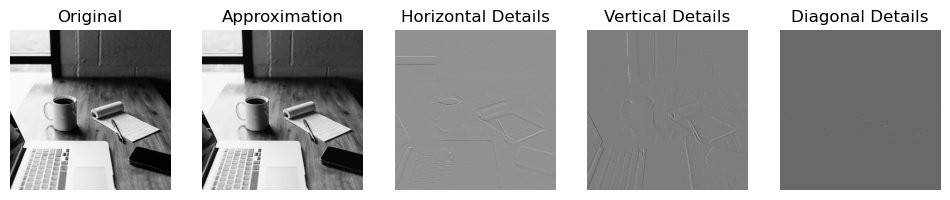

In [29]:
discrete_wavelete_transform(img1)

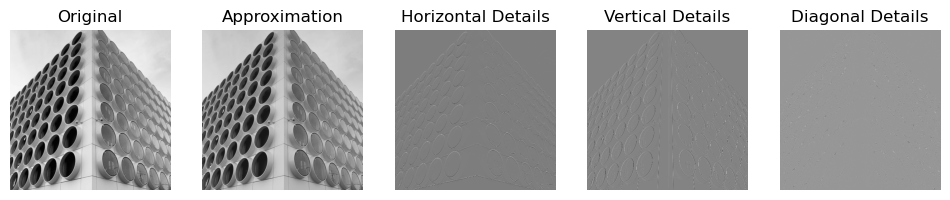

In [30]:
discrete_wavelete_transform(img2)

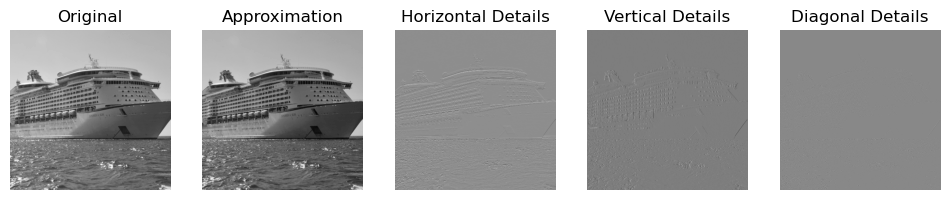

In [31]:
discrete_wavelete_transform(img3)

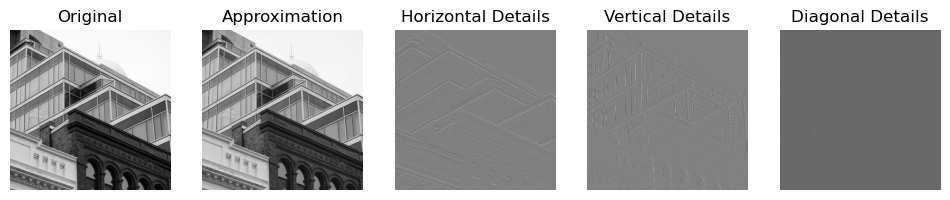

In [32]:
discrete_wavelete_transform(img4)